# Importing Libraries

In [947]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


## Loading DataSet

In [948]:
df  =pd.read_excel("sample_cyclone_detection.xlsx",sheet_name=0)
df

,Date,State,Cyclone name,Latitude °N,Longitude °E,Wind speed ( kmph),Pressure (mbar),Behaviour,Sea Temperature °C,Origin,Date(wp),State.1,Wind Speed(wp)kmph,Latitude (wp) ° N,Longitude (wp),End Date,Days Active,Cyclone
0,2014-10-06 00:00:00,NaN,Hudhud,17.7,83.3,185,960,Very severe,30,Andaman sea,2014-10-13,Chattisgarh,40,15.9,85.7,2014-10-14 00:00:00,1,Yes
1,2019-04-26 00:00:00,Odisha,Fani,2.7,89.7,215,932,Severe,30,Indian Ocean,2019-05-04,Bhutan,90,22.5,88.4,2019-05-05 00:00:00,1,Yes
2,2019-11-05 00:00:00,West Bengal,Bulbul,15.0,90.0,240,976,Strongest,31,Bay of Bengal,2019-11-10,Bangaladesh,60,23.1,91.9,2019-11-11 00:00:00,1,Yes
3,2019-06-10 00:00:00,Pakistan,Vayu,21.8,66.8,185,970,Extremely severe,31,Arabian sea,2019-06-14,Gujarat,65,20.8,68.2,2019-06-17 00:00:00,3,Yes
4,10-Nov-2018,NaN,Gaja,11.2,67.0,140,976,Very Severe,30,Bay of Bengal,2018-11-17,Kalpeni,55,9.8,73.2,19-Nov-2018,2,Yes
5,26-Jan-2008,NaN,Gene,27.4,173.6,185,945,Severe,31,Pacific ocean,2008-02-07,Noumea,63,17.3,178.5,9-Feb-2008,2,Yes
6,2018-10-06 00:00:00,Oman,Luban,12.5,61.0,155,978,Very Severe,31,Arabian sea,2018-10-13,Salalah,83,12.3,62.4,2018-10-15 00:00:00,2,Yes
7,2001-10-04 00:00:00,Belize,Iris,12.3,59.9,230,948,Severe,31,Atlantic,2018-10-08,NaN,125,16.5,88.0,2001-10-09 00:00:00,1,Yes
8,2018-03-03 00:00:00,Nadi,Hola,16.1,166.9,185,952,Severe,30,NaN,2018-03-11,Kingston,74,17.6,165.4,2018-03-13 00:00:00,2,Yes
9,2018-05-13 00:00:00,Gulf of Aden,Sagar,10.3,43.7,120,994,Severe,30,Arabian sea,2018-05-13,Ethopia,75,13.2,48.7,2018-05-20 00:00:00,7,Yes


In [949]:
df.columns

Index(['Date', 'State', 'Cyclone name', 'Latitude °N', 'Longitude  °E',
       'Wind speed ( kmph)', 'Pressure (mbar)', 'Behaviour',
       'Sea Temperature °C', 'Origin ', 'Date(wp)', 'State.1',
       'Wind Speed(wp)kmph', 'Latitude (wp) ° N', 'Longitude (wp)', 'End Date',
       'Days Active', 'Cyclone'],
      dtype='object')

In [950]:
dummies = pd.get_dummies(df["Behaviour"])
dummies

,Extremely severe,Severe,Strongest,Very Severe,Very severe
0,0,0,0,0,1
1,0,1,0,0,0
2,0,0,1,0,0
3,1,0,0,0,0
4,0,0,0,1,0
5,0,1,0,0,0
6,0,0,0,1,0
7,0,1,0,0,0
8,0,1,0,0,0
9,0,1,0,0,0


In [951]:
labelencoder= LabelEncoder()
df["Behaviour"]=labelencoder.fit_transform(df["Behaviour"])
df["Cyclone"]=labelencoder.fit_transform(df["Cyclone"])
df

,Date,State,Cyclone name,Latitude °N,Longitude °E,Wind speed ( kmph),Pressure (mbar),Behaviour,Sea Temperature °C,Origin,Date(wp),State.1,Wind Speed(wp)kmph,Latitude (wp) ° N,Longitude (wp),End Date,Days Active,Cyclone
0,2014-10-06 00:00:00,NaN,Hudhud,17.7,83.3,185,960,4,30,Andaman sea,2014-10-13,Chattisgarh,40,15.9,85.7,2014-10-14 00:00:00,1,0
1,2019-04-26 00:00:00,Odisha,Fani,2.7,89.7,215,932,1,30,Indian Ocean,2019-05-04,Bhutan,90,22.5,88.4,2019-05-05 00:00:00,1,0
2,2019-11-05 00:00:00,West Bengal,Bulbul,15.0,90.0,240,976,2,31,Bay of Bengal,2019-11-10,Bangaladesh,60,23.1,91.9,2019-11-11 00:00:00,1,0
3,2019-06-10 00:00:00,Pakistan,Vayu,21.8,66.8,185,970,0,31,Arabian sea,2019-06-14,Gujarat,65,20.8,68.2,2019-06-17 00:00:00,3,0
4,10-Nov-2018,NaN,Gaja,11.2,67.0,140,976,3,30,Bay of Bengal,2018-11-17,Kalpeni,55,9.8,73.2,19-Nov-2018,2,0
5,26-Jan-2008,NaN,Gene,27.4,173.6,185,945,1,31,Pacific ocean,2008-02-07,Noumea,63,17.3,178.5,9-Feb-2008,2,0
6,2018-10-06 00:00:00,Oman,Luban,12.5,61.0,155,978,3,31,Arabian sea,2018-10-13,Salalah,83,12.3,62.4,2018-10-15 00:00:00,2,0
7,2001-10-04 00:00:00,Belize,Iris,12.3,59.9,230,948,1,31,Atlantic,2018-10-08,NaN,125,16.5,88.0,2001-10-09 00:00:00,1,0
8,2018-03-03 00:00:00,Nadi,Hola,16.1,166.9,185,952,1,30,NaN,2018-03-11,Kingston,74,17.6,165.4,2018-03-13 00:00:00,2,0
9,2018-05-13 00:00:00,Gulf of Aden,Sagar,10.3,43.7,120,994,1,30,Arabian sea,2018-05-13,Ethopia,75,13.2,48.7,2018-05-20 00:00:00,7,0


In [952]:
# df1=pd.concat((df,dummies),axis=1)
# df1
df.columns

Index(['Date', 'State', 'Cyclone name', 'Latitude °N', 'Longitude  °E',
       'Wind speed ( kmph)', 'Pressure (mbar)', 'Behaviour',
       'Sea Temperature °C', 'Origin ', 'Date(wp)', 'State.1',
       'Wind Speed(wp)kmph', 'Latitude (wp) ° N', 'Longitude (wp)', 'End Date',
       'Days Active', 'Cyclone'],
      dtype='object')

In [953]:
l=["Cyclone name","State","Date","Origin ","Date(wp)","State.1","End Date"]
for i in l:
    df.drop(i,axis="columns",inplace=True)

df

,Latitude °N,Longitude °E,Wind speed ( kmph),Pressure (mbar),Behaviour,Sea Temperature °C,Wind Speed(wp)kmph,Latitude (wp) ° N,Longitude (wp),Days Active,Cyclone
0,17.7,83.3,185,960,4,30,40,15.9,85.7,1,0
1,2.7,89.7,215,932,1,30,90,22.5,88.4,1,0
2,15.0,90.0,240,976,2,31,60,23.1,91.9,1,0
3,21.8,66.8,185,970,0,31,65,20.8,68.2,3,0
4,11.2,67.0,140,976,3,30,55,9.8,73.2,2,0
5,27.4,173.6,185,945,1,31,63,17.3,178.5,2,0
6,12.5,61.0,155,978,3,31,83,12.3,62.4,2,0
7,12.3,59.9,230,948,1,31,125,16.5,88.0,1,0
8,16.1,166.9,185,952,1,30,74,17.6,165.4,2,0
9,10.3,43.7,120,994,1,30,75,13.2,48.7,7,0


In [954]:
df.shape


(10, 11)

In [955]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Latitude °N         10 non-null     float64
 1   Longitude  °E       10 non-null     float64
 2   Wind speed ( kmph)  10 non-null     int64  
 3   Pressure (mbar)     10 non-null     int64  
 4   Behaviour           10 non-null     int32  
 5   Sea Temperature °C  10 non-null     int64  
 6   Wind Speed(wp)kmph  10 non-null     int64  
 7   Latitude (wp) ° N   10 non-null     float64
 8   Longitude (wp)      10 non-null     float64
 9   Days Active         10 non-null     int64  
 10  Cyclone             10 non-null     int32  
dtypes: float64(4), int32(2), int64(5)
memory usage: 928.0 bytes


In [956]:
df.describe()

,Latitude °N,Longitude °E,Wind speed ( kmph),Pressure (mbar),Behaviour,Sea Temperature °C,Wind Speed(wp)kmph,Latitude (wp) ° N,Longitude (wp),Days Active,Cyclone
count,10.00000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0
mean,14.70000,90.190000,184.000000,963.10000,1.700000,30.500000,73.000000,16.900000,95.040000,2.200000,0.0
std,6.74092,44.603349,38.137179,18.89415,1.251666,0.527046,23.199617,4.372642,42.839473,1.813529,0.0
min,2.70000,43.700000,120.000000,932.00000,0.000000,30.000000,40.000000,9.800000,48.700000,1.000000,0.0
25%,11.47500,62.450000,162.500000,949.00000,1.000000,30.000000,60.750000,13.875000,69.450000,1.000000,0.0
50%,13.75000,75.150000,185.000000,965.00000,1.000000,30.500000,69.500000,16.900000,86.850000,2.000000,0.0
75%,17.30000,89.925000,207.500000,976.00000,2.750000,31.000000,81.000000,20.000000,91.025000,2.000000,0.0
max,27.40000,173.600000,240.000000,994.00000,4.000000,31.000000,125.000000,23.100000,178.500000,7.000000,0.0


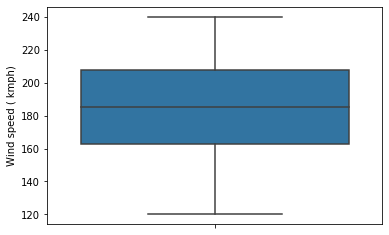

In [957]:
sns.boxplot(y=df['Wind speed ( kmph)'])

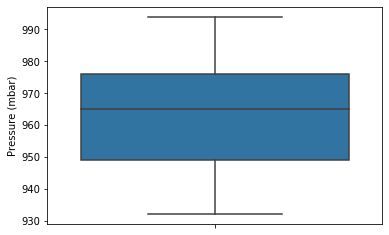

In [958]:
sns.boxplot(y=df['Pressure (mbar)'])

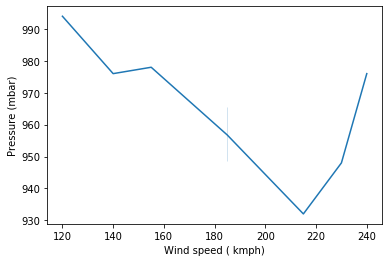

In [959]:
    sns.lineplot(x=df['Wind speed ( kmph)'],y=df['Pressure (mbar)'])

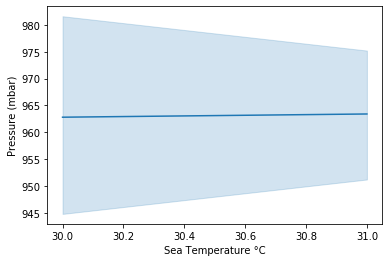

In [960]:
sns.lineplot(x=df['Sea Temperature °C'],y=df['Pressure (mbar)'])

In [961]:
df.columns

Index(['Latitude °N', 'Longitude  °E', 'Wind speed ( kmph)', 'Pressure (mbar)',
       'Behaviour', 'Sea Temperature °C', 'Wind Speed(wp)kmph',
       'Latitude (wp) ° N', 'Longitude (wp)', 'Days Active', 'Cyclone'],
      dtype='object')

In [962]:
X = df[['Wind speed ( kmph)','Pressure (mbar)','Sea Temperature °C','Wind Speed(wp)kmph','Days Active']]
y=df['Behaviour']

In [963]:
X_train ,X_test, y_train, y_test= train_test_split(X,y,test_size=0.4)


In [964]:
X_train

,Wind speed ( kmph),Pressure (mbar),Sea Temperature °C,Wind Speed(wp)kmph,Days Active
4,140,976,30,55,2
6,155,978,31,83,2
7,230,948,31,125,1
9,120,994,30,75,7
5,185,945,31,63,2
3,185,970,31,65,3


In [965]:
rf = RandomForestClassifier(n_estimators=1000,max_features=2,oob_score=True)

In [966]:
# yy=np.array.reshape(-1,1)
# scaler = StandardScaler()
# scale =scaler.fit(y_test)
# y_test=scale.transform(yy)


In [967]:
rf.fit(X=X_train,y=y_train)
# print("Accuracy: ",round(float(rf.oob_score_)*100,2))
print("Accuracy: ",round(rf.oob_score_*100,2), "%")

Accuracy:  16.67 %


In [968]:
# pred=rf.predict(y_test)

In [969]:
a=['Wind speed ( kmph)','Pressure (mbar)','Sea Temperature °C','Wind Speed(wp)kmph','Days Active']
for a, imp in zip(a,rf.feature_importances_):
    print(a.ljust(20)," : {0:.2f}".format(imp*100),"%")

Wind speed ( kmph)    : 21.22 %
Pressure (mbar)       : 28.02 %
Sea Temperature °C    : 5.41 %
Wind Speed(wp)kmph    : 22.88 %
Days Active           : 22.47 %
